# Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#To ignore warnings

import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_columns' , None)
pd.set_option('display.max_rows' , None)
pd.set_option('display.width' , None)

# Import Dataset

In [4]:
bank = pd.read_csv(r'C:\Users\Hp\Desktop\data science\Python\Datasets\XYZCorp_LendingData.txt',delimiter= '\t',
                  index_col=1,header=0)
bank.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1296599,1077501,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1314167,1077430,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1313524,1077175,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1277178,1076863,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1311748,1075358,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


# EDA

In [5]:
bank.shape

(855969, 72)

Creating a copy of our dataset

In [6]:
bank1 = pd.DataFrame.copy(bank)

We have total 72 columns in our dataset

I have created a generic code to find out the columns whose missing value is more than 70%, these variable wont be of any use

We can change the threshold value also in below code as per requirement

In [7]:
bank_shape = bank.shape
dict1 = {}
dict1 = bank1.isnull().sum()

df = pd.DataFrame(dict1)

df.columns = ['values']

df2 = df[df.values > 0.7 * bank_shape[0]]
list(df2.index.values)

['desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m']

Removing variable based on Missing value count more tha 70%

In [8]:
bank1 = bank1.drop(['desc',
 'mths_since_last_record',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m'] , axis = 1)

Dropping columns which are irrelevant for us based on domain knowledge

In [9]:
#dropping on domain knowledge

bank1 = bank1.drop(['id' , 'sub_grade' , 'emp_title' , 'title' , 'zip_code' , 'addr_state' , 'earliest_cr_line',
                   'inq_last_6mths' , 'pub_rec' , 'initial_list_status' , 'recoveries' ,'next_pymnt_d',
                    'collection_recovery_fee' , 'acc_now_delinq',
                   'policy_code' , 'tot_coll_amt' , 'collections_12_mths_ex_med']
                   ,axis = 1)

In [10]:
bank1.shape

(855969, 35)

# Missing value treatment

## Handling missing value by regression

We will handle a missing value column by regression technique, we are using Linear regression here

We will treat tot_cur_bal by regression technique

In [11]:
corr = bank1.corr()
corr


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_amnt,tot_cur_bal,total_rev_hi_lim,default_ind
loan_amnt,1.000000,0.999265,0.997601,0.142966,0.944870,0.335209,0.020189,-0.000739,-0.039230,0.198926,0.337489,0.119635,0.222084,0.639784,0.639786,0.479612,0.480328,0.395880,0.537586,0.025966,0.233596,0.329130,0.312072,-0.004907
funded_amnt,0.999265,1.000000,0.998485,0.143116,0.945903,0.335002,0.020583,-0.000424,-0.039290,0.199432,0.337405,0.120147,0.222039,0.641706,0.641709,0.478290,0.479172,0.394669,0.536533,0.025579,0.233134,0.329128,0.312071,-0.005797
funded_amnt_inv,0.997601,0.998485,1.000000,0.143374,0.944149,0.334356,0.021489,0.000050,-0.037936,0.200055,0.336870,0.120931,0.222258,0.644011,0.644023,0.474600,0.478589,0.391010,0.534517,0.023091,0.232029,0.329152,0.312107,-0.008209
int_rate,0.142966,0.143116,0.143374,1.000000,0.130468,-0.073825,0.078454,0.055400,-0.030431,-0.011091,-0.035344,0.271687,-0.039482,0.033933,0.033790,0.173387,0.174453,0.059298,0.446517,0.050743,0.107346,-0.091430,-0.165533,0.155037
installment,0.944870,0.945903,0.944149,0.130468,1.000000,0.328578,0.013909,0.007224,-0.042336,0.183817,0.320017,0.131928,0.199872,0.539840,0.539835,0.520613,0.521332,0.455444,0.502038,0.035728,0.243246,0.298352,0.286857,0.004753
annual_inc,0.335209,0.335002,0.334356,-0.073825,0.328578,1.000000,-0.086821,0.047749,-0.050972,0.139429,0.298569,0.036753,0.188651,0.211549,0.211591,0.163226,0.163275,0.152245,0.130367,0.009864,0.092662,0.422618,0.271059,-0.037066
dti,0.020189,0.020583,0.021489,0.078454,0.013909,-0.086821,1.000000,-0.002677,0.000743,0.142068,0.067119,0.086649,0.106266,0.058057,0.058021,-0.040537,-0.039563,-0.050855,0.008750,-0.006245,-0.028601,-0.007133,0.032430,0.004429
delinq_2yrs,-0.000739,-0.000424,0.000050,0.055400,0.007224,0.047749,-0.002677,1.000000,-0.564450,0.051502,-0.031807,-0.016299,0.121978,0.030884,0.030874,-0.031777,-0.031346,-0.038068,0.001380,0.013992,-0.018805,0.064618,-0.040575,-0.009186
mths_since_last_delinq,-0.039230,-0.039290,-0.037936,-0.030431,-0.042336,-0.050972,0.000743,-0.564450,1.000000,-0.045801,-0.027878,0.011874,-0.047015,-0.037411,-0.037398,-0.008195,-0.006771,0.000005,-0.029148,-0.016837,0.006239,-0.094068,-0.029510,0.001317
open_acc,0.198926,0.199432,0.200055,-0.011091,0.183817,0.139429,0.142068,0.051502,-0.045801,1.000000,0.225858,-0.144959,0.694850,0.171050,0.171053,0.043452,0.044552,0.032115,0.061725,-0.009957,0.029130,0.244465,0.325179,-0.021698


Finding variables who has a relation with our target variable

In [12]:
corr['tot_cur_bal'][abs(corr['tot_cur_bal']) > 0.1]

loan_amnt           0.329130
funded_amnt         0.329128
funded_amnt_inv     0.329152
installment         0.298352
annual_inc          0.422618
open_acc            0.244465
revol_bal           0.443059
total_acc           0.311268
out_prncp           0.207565
out_prncp_inv       0.207597
total_pymnt         0.169289
total_pymnt_inv     0.169301
total_rec_prncp     0.157435
total_rec_int       0.134022
last_pymnt_amnt     0.103113
tot_cur_bal         1.000000
total_rev_hi_lim    0.384867
Name: tot_cur_bal, dtype: float64

Creating a new dataframe

In [13]:
df = bank1[['loan_amnt' , 'funded_amnt' , 'funded_amnt_inv', 'installment' , 'annual_inc' ,
            'open_acc' ,'revol_bal','total_acc' ,'out_prncp' ,'out_prncp_inv' ,'total_pymnt' ,'total_pymnt_inv'
             ,'total_rec_prncp','total_rec_int' , 'total_rev_hi_lim' , 'tot_cur_bal' ]].copy()

In [14]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
installment             0
annual_inc              0
open_acc                0
revol_bal               0
total_acc               0
out_prncp               0
out_prncp_inv           0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
total_rev_hi_lim    67313
tot_cur_bal         67313
dtype: int64

In [15]:
df = df.drop('total_rev_hi_lim' , axis = 1)

In [16]:
df.isnull().sum()

loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
installment            0
annual_inc             0
open_acc               0
revol_bal              0
total_acc              0
out_prncp              0
out_prncp_inv          0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
tot_cur_bal        67313
dtype: int64

Creating data frame with non missing value for creating linear model for predicting values

Train test split

In [17]:
train = df.dropna()
train.shape


(788656, 15)

In [18]:
test = df[df['tot_cur_bal'].isnull()]#.drop("Gender", axis=1)
test.shape

(67313, 15)

In [19]:
Xtrain = train.drop(['tot_cur_bal'] , axis = 1)

In [20]:
Ytrain = train[['tot_cur_bal' ]].copy()

In [21]:
Xtrain.shape

(788656, 14)

In [22]:
Ytrain.shape

(788656, 1)

In [23]:
Xtest = test.drop(['tot_cur_bal'] , axis = 1)

In [24]:
Ytest = test[['tot_cur_bal' ]].copy()

In [25]:
Ytest.shape

(67313, 1)

In [26]:
Xtest.shape

(67313, 14)

In [27]:
from sklearn.linear_model import LinearRegression, LogisticRegression

linReg = LinearRegression()

linReg.fit(Xtrain,Ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
Y_pred=linReg.predict(Xtest)

In [29]:
Y_pred.shape

(67313, 1)

In [30]:
Xtest.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,open_acc,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int
member_id,,,,,,,,,,,,,,
1296599,5000.0,5000.0,4975.0,162.87,24000.0,3.0,13648.0,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07
1314167,2500.0,2500.0,2500.0,59.83,30000.0,3.0,1687.0,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17


In [31]:

Xtest["tot_cur_bal"]=Y_pred

In [32]:
Xtest.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,open_acc,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,tot_cur_bal
member_id,,,,,,,,,,,,,,,
1296599,5000.0,5000.0,4975.0,162.87,24000.0,3.0,13648.0,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,46460.673103
1314167,2500.0,2500.0,2500.0,59.83,30000.0,3.0,1687.0,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,7106.487765


Now we have to concat Xtest and train - axis = 0

In [33]:
Xtest.shape

(67313, 15)

In [34]:
train.shape

(788656, 15)

In [35]:
result = pd.concat([train, Xtest], axis=0)
result.shape

(855969, 15)

In [36]:
result.isnull().sum()

loan_amnt          0
funded_amnt        0
funded_amnt_inv    0
installment        0
annual_inc         0
open_acc           0
revol_bal          0
total_acc          0
out_prncp          0
out_prncp_inv      0
total_pymnt        0
total_pymnt_inv    0
total_rec_prncp    0
total_rec_int      0
tot_cur_bal        0
dtype: int64

In [37]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855969 entries, 12000897 to 1289878
Data columns (total 15 columns):
loan_amnt          855969 non-null float64
funded_amnt        855969 non-null float64
funded_amnt_inv    855969 non-null float64
installment        855969 non-null float64
annual_inc         855969 non-null float64
open_acc           855969 non-null float64
revol_bal          855969 non-null float64
total_acc          855969 non-null float64
out_prncp          855969 non-null float64
out_prncp_inv      855969 non-null float64
total_pymnt        855969 non-null float64
total_pymnt_inv    855969 non-null float64
total_rec_prncp    855969 non-null float64
total_rec_int      855969 non-null float64
tot_cur_bal        855969 non-null float64
dtypes: float64(15)
memory usage: 104.5 MB


Now from our main dataset we need to remove the original column and add this new column from result

Creating a copy of existing dataframe, we need to replace one variable now


In [38]:
bank4 = pd.DataFrame.copy(bank1)
bank4.shape

(855969, 35)

In [39]:
bank4 = bank4.drop(['tot_cur_bal'] , axis=1)
bank4.shape

(855969, 34)

In [40]:
bank4["tot_cur_bal"]= result['tot_cur_bal']
bank4.shape

(855969, 35)

In [41]:
bank4.isnull().sum()


loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                 43061
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                    0
mths_since_last_delinq    439812
open_acc                       0
revol_bal                      0
revol_util                   446
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
last_pymnt_d                8862
last_pymnt_amnt                0
last_credi

Missing value treated has been as per expection

Order of column is not proper 

Creating a copy for sorting column

In [42]:
bank1= pd.DataFrame.copy(bank4)

In [43]:
cols = list(bank1.columns.values)
cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type',
 'total_rev_hi_lim',
 'default_ind',
 'tot_cur_bal']

In [44]:
bank1= bank1[['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'pymnt_plan',
 'purpose',
 'dti',
 'delinq_2yrs',
 'mths_since_last_delinq',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type',
 'total_rev_hi_lim',
              'tot_cur_bal',
 'default_ind',
 ]]

In [45]:
bank1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,total_rev_hi_lim,tot_cur_bal,default_ind
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-2011,n,credit_card,27.65,0.0,NaN,3.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,Jan-2015,171.62,Jan-2016,INDIVIDUAL,NaN,46460.673103,0
1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,car,1.00,0.0,NaN,3.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,Apr-2013,119.66,Sep-2013,INDIVIDUAL,NaN,7106.487765,1
1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,small_business,8.72,0.0,NaN,2.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,Jun-2014,649.91,Jan-2016,INDIVIDUAL,NaN,13402.095922,0
1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,other,20.00,0.0,35.0,10.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,Jan-2015,357.48,Jan-2015,INDIVIDUAL,NaN,120313.025223,0
1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-2011,n,other,17.94,0.0,38.0,15.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,Jan-2016,67.79,Jan-2016,INDIVIDUAL,NaN,174823.016486,0


Columns are now sorted

In [46]:
bank1.shape

(855969, 35)

In [47]:
bank1.isnull().sum()

loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
emp_length                 43061
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
pymnt_plan                     0
purpose                        0
dti                            0
delinq_2yrs                    0
mths_since_last_delinq    439812
open_acc                       0
revol_bal                      0
revol_util                   446
total_acc                      0
out_prncp                      0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
total_rec_prncp                0
total_rec_int                  0
total_rec_late_fee             0
last_pymnt_d                8862
last_pymnt_amnt                0
last_credi

In [48]:
bank1.dtypes

loan_amnt                 float64
funded_amnt               float64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
grade                      object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
pymnt_plan                 object
purpose                    object
dti                       float64
delinq_2yrs               float64
mths_since_last_delinq    float64
open_acc                  float64
revol_bal                 float64
revol_util                float64
total_acc                 float64
out_prncp                 float64
out_prncp_inv             float64
total_pymnt               float64
total_pymnt_inv           float64
total_rec_prncp           float64
total_rec_int             float64
total_rec_late_fee        float64
last_pymnt_d               object
last_pymnt_amn

Treating remaining values now

We will treat numerical values now

In [49]:
colname=["mths_since_last_delinq","revol_util","tot_cur_bal","total_rev_hi_lim"]

for x in colname:
            bank1[x].fillna(round(bank1[x].mean(),0),inplace=True) #0-rounded off



We will treat categorical variable now

In [50]:
#Handling missing values for categorical values


for x in [ "last_pymnt_d",
             "last_credit_pull_d"]:
    bank1[x].fillna(bank1[x].mode()[0], inplace=True)

In [51]:
bank1.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                43061
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
dti                           0
delinq_2yrs                   0
mths_since_last_delinq        0
open_acc                      0
revol_bal                     0
revol_util                    0
total_acc                     0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
last_pymnt_d                  0
last_pymnt_amnt               0
last_credit_pull_d            0
applicat

Now only one variable has missing value

Values in emp_length

In [52]:
bank1.emp_length.value_counts()

10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64

For this variable, we will create a function to replace values 

In [53]:
def emplen(row):
    return str(row.replace('10+ years' , '10').replace('9 years' , '9').replace('8 years' , '8').replace('7 years' , '7')
          .replace('6 years' , '6').replace('5 years' , '5').replace('4 years' , '4').replace('3 years' , '3')
          .replace('2 years' , '2').replace('1 year' , '1').replace('< 1 year' , '< 1'))

In [54]:
bank1['emp_length'] = bank1['emp_length'].astype(str).apply(emplen)

In [55]:
bank1['emp_length'] = bank1['emp_length'].replace('< 1' , '0' , regex = True)
bank1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,dti,delinq_2yrs,mths_since_last_delinq,open_acc,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type,total_rev_hi_lim,tot_cur_bal,default_ind
member_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,10,RENT,24000.0,Verified,Dec-2011,n,credit_card,27.65,0.0,34.0,3.0,13648.0,83.7,9.0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,Jan-2015,171.62,Jan-2016,INDIVIDUAL,32164.0,46460.673103,0
1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,0,RENT,30000.0,Source Verified,Dec-2011,n,car,1.00,0.0,34.0,3.0,1687.0,9.4,4.0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,Apr-2013,119.66,Sep-2013,INDIVIDUAL,32164.0,7106.487765,1
1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,10,RENT,12252.0,Not Verified,Dec-2011,n,small_business,8.72,0.0,34.0,2.0,2956.0,98.5,10.0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,Jun-2014,649.91,Jan-2016,INDIVIDUAL,32164.0,13402.095922,0
1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,10,RENT,49200.0,Source Verified,Dec-2011,n,other,20.00,0.0,35.0,10.0,5598.0,21.0,37.0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,Jan-2015,357.48,Jan-2015,INDIVIDUAL,32164.0,120313.025223,0
1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,1,RENT,80000.0,Source Verified,Dec-2011,n,other,17.94,0.0,38.0,15.0,27783.0,53.9,38.0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,Jan-2016,67.79,Jan-2016,INDIVIDUAL,32164.0,174823.016486,0


In [56]:
bank1.emp_length.value_counts()

10     282090
2       75986
0       67597
3       67392
1       54855
5       53812
4       50643
7       43204
nan     43061
8       42421
6       41446
9       33462
Name: emp_length, dtype: int64

In [57]:
bank1['emp_length'] = bank1['emp_length'].replace('nan' , '10' , regex = True) #replacing MV by mode 


In [58]:
bank1.emp_length.value_counts()

10    325151
2      75986
0      67597
3      67392
1      54855
5      53812
4      50643
7      43204
8      42421
6      41446
9      33462
Name: emp_length, dtype: int64

In [59]:
bank1.isnull().sum()

#missing values handled

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
pymnt_plan                0
purpose                   0
dti                       0
delinq_2yrs               0
mths_since_last_delinq    0
open_acc                  0
revol_bal                 0
revol_util                0
total_acc                 0
out_prncp                 0
out_prncp_inv             0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
total_rec_late_fee        0
last_pymnt_d              0
last_pymnt_amnt           0
last_credit_pull_d        0
application_type          0
total_rev_hi_lim          0
tot_cur_bal               0
default_ind               0
dtype: int64

 Missing value handled

# Outlier check

We will create a copy of existing dataframe and then proceed

In [60]:
bank2 = pd.DataFrame.copy(bank1)

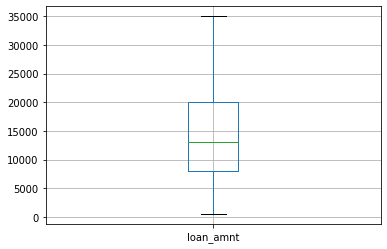

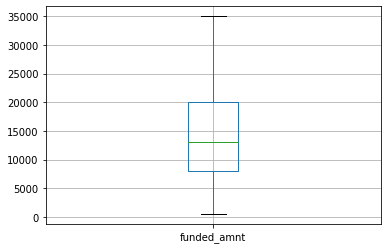

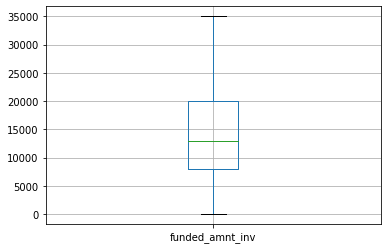

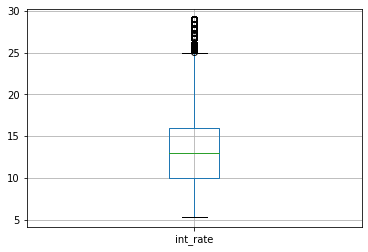

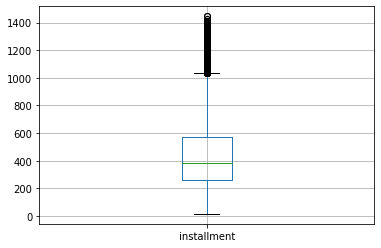

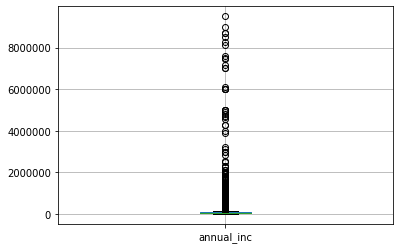

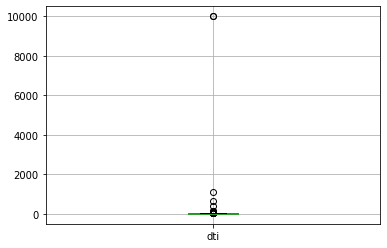

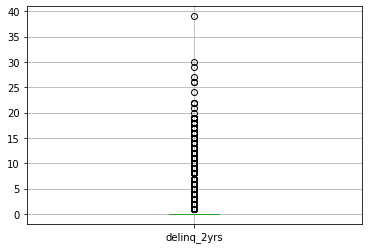

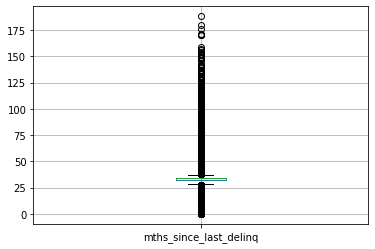

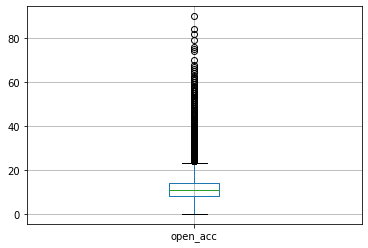

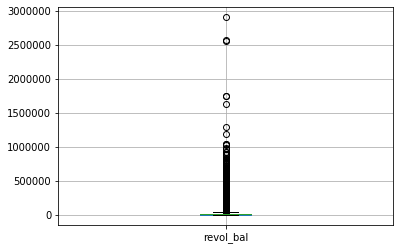

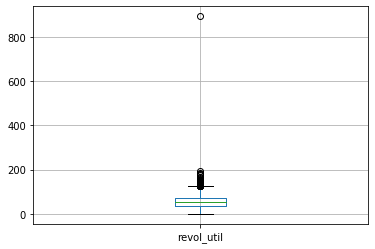

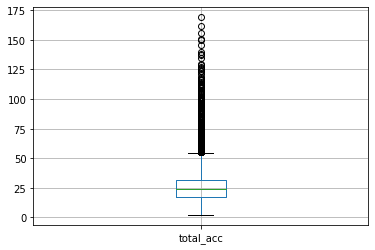

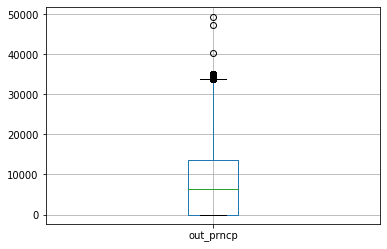

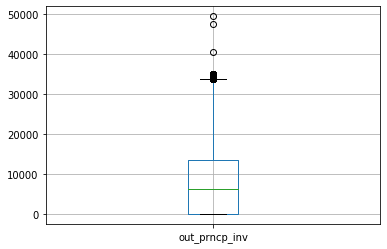

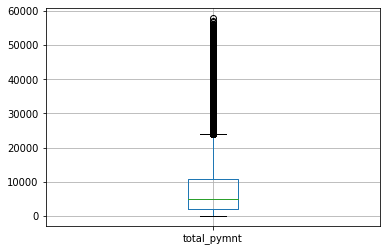

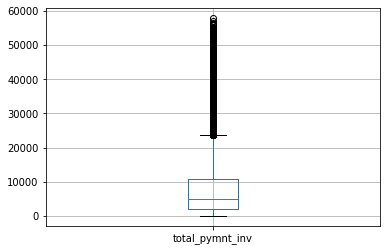

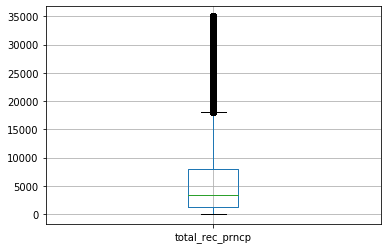

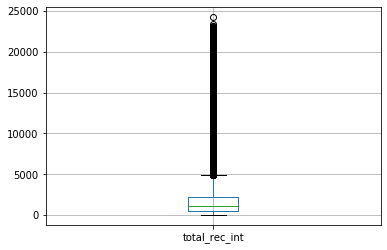

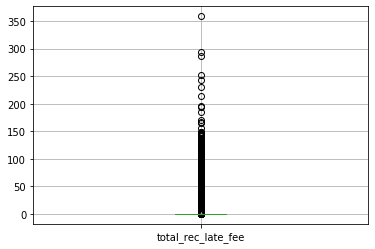

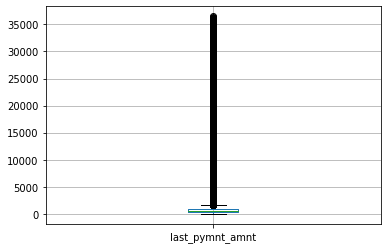

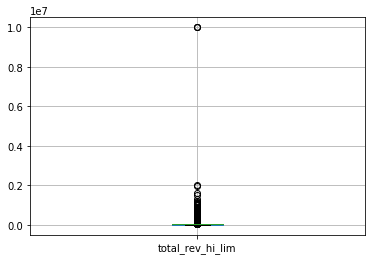

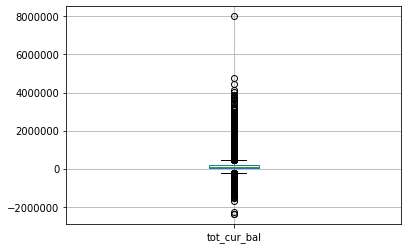

In [61]:
# to generate boxplot for all numerical varibales

import matplotlib.pyplot as plt
colname=[]
for x in bank2.columns[:-1]:
    if bank2[x].dtype=="int64" or bank2[x].dtype=="float64":
        colname.append(x)

for x in colname:
    bank2.boxplot(column=x)
    plt.show()

It is not suggested to treat a cluster of outlier points as it will create biasness in our dataset

Also We do not impute money related variable

Thus we will treat revol_util and dti only

In [62]:
q1 =bank2['revol_util'].quantile(0.25) #first quartile value
q3 =bank2['revol_util'].quantile(0.75) #third quartile value
iqr = q3 - q1 #interquartile range
low = q1 - 1.5*iqr #acceptable range
high = q3 + 1.5*iqr #acceptable range


In [63]:
bank2_include = bank2.loc[(bank2['revol_util'] >= low) &\
                               (bank2['revol_util'] <= high)]

bank2_exclude = bank2.loc[(bank2['revol_util'] < low) | \
                               (bank2['revol_util'] > high)]


In [64]:
bank2_include.shape

(855925, 35)

In [65]:
bank2_exclude.shape

(44, 35)

In [66]:
#code for capping
bank2_exclude.loc[bank2_exclude['revol_util'] < low, 'revol_util'] = low
bank2_exclude.loc[bank2_exclude['revol_util'] > high, 'revol_util'] = high


In [67]:
bank4 = pd.concat([bank2_include , bank2_exclude])
bank4.shape

(855969, 35)

In [68]:
q1 =bank4['dti'].quantile(0.25) #first quartile value
q3 =bank4['dti'].quantile(0.75) #third quartile value
iqr = q3 - q1 #interquartile range
low = q1 - 1.5*iqr #acceptable range
high = q3 + 1.5*iqr #acceptable range


In [69]:
bank4_include = bank4.loc[(bank4['dti'] >= low) &\
                               (bank4['dti'] <= high)]

bank4_exclude = bank4.loc[(bank4['dti'] < low) | \
                               (bank4['dti'] > high)]



In [70]:
bank4_include.shape

(855899, 35)

In [71]:
bank4_exclude.shape

(70, 35)

In [72]:
#code for capping
bank4_exclude.loc[bank4_exclude['dti'] < low, 'dti'] = low
bank4_exclude.loc[bank4_exclude['dti'] > high, 'dti'] = high


In [73]:
bank1 = pd.concat([bank4_include , bank4_exclude])
bank1.shape

(855969, 35)

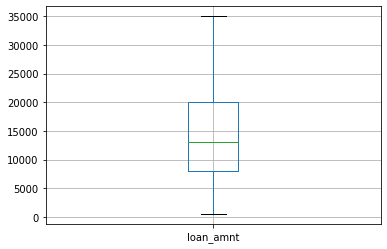

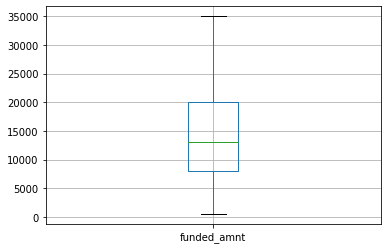

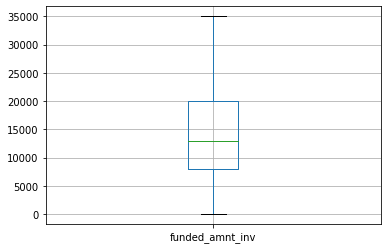

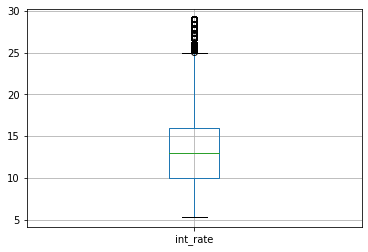

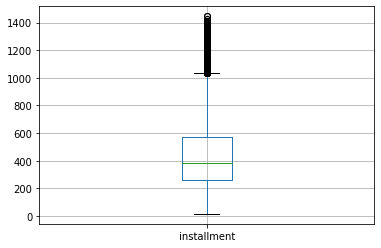

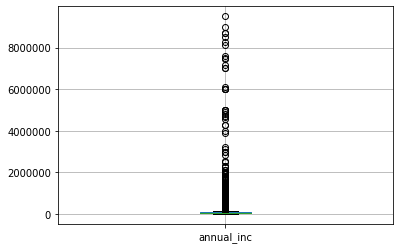

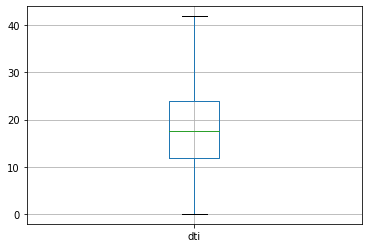

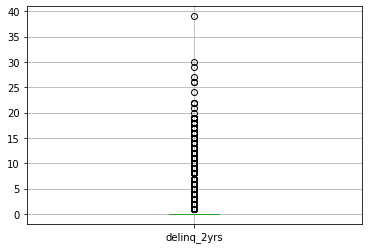

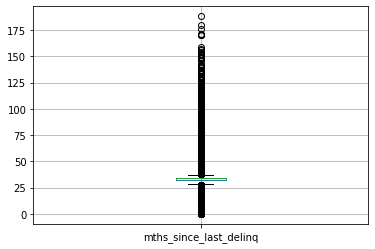

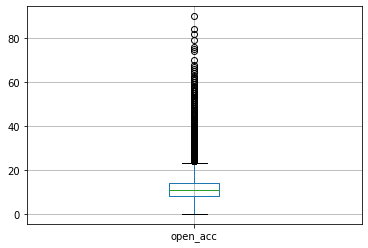

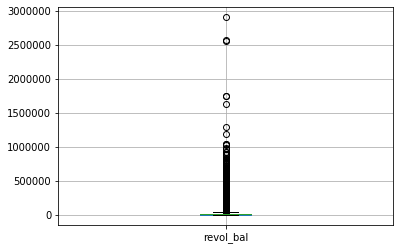

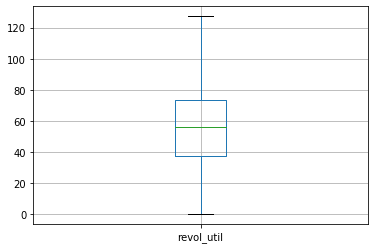

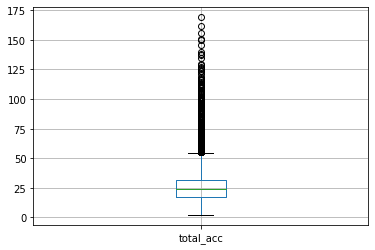

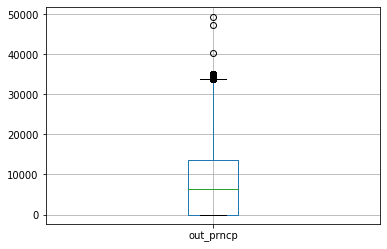

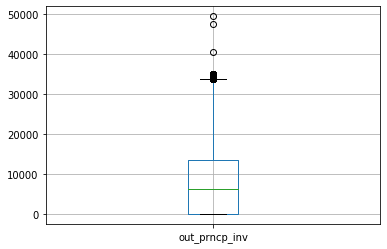

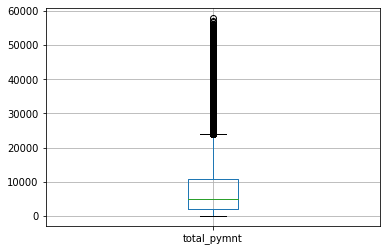

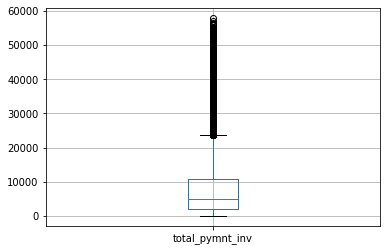

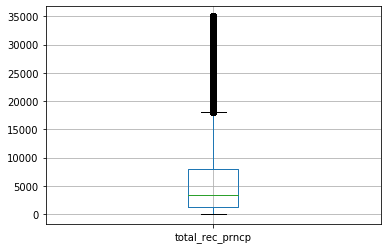

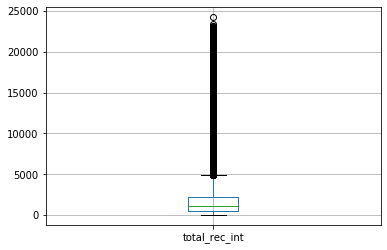

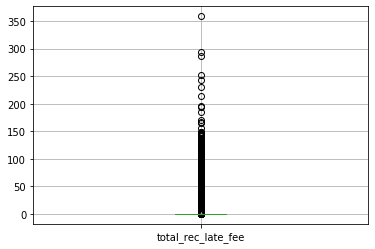

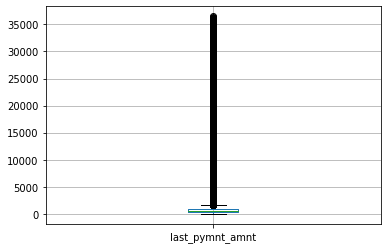

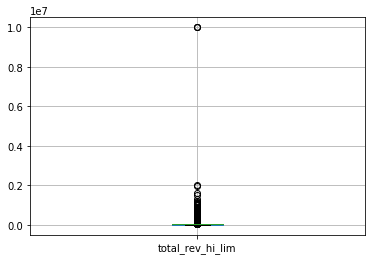

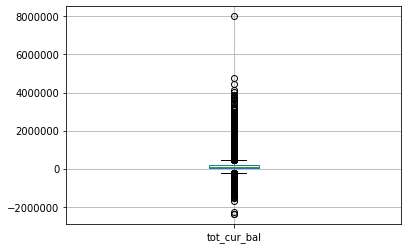

In [74]:
# to generate boxplot for all numerical varibales

import matplotlib.pyplot as plt
colname=[]
for x in bank1.columns[:-1]:
    if bank1[x].dtype=="int64" or bank1[x].dtype=="float64":
        colname.append(x)

for x in colname:
    bank1.boxplot(column=x)
    plt.show()

Outlier imputation has been done

Converting issue date to datetime format

In [75]:
bank1['issue_d'] = pd.to_datetime(bank1['issue_d']) #default format:yyyy-mm-dd

# Convert categorical variable to numerical variable

In [76]:
colname=[]    
for x in bank1.columns[:]:
    if bank1[x].dtype=='object':
        colname.append(x)   #append(x) for X increament
colname

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'pymnt_plan',
 'purpose',
 'last_pymnt_d',
 'last_credit_pull_d',
 'application_type']

In [77]:
from sklearn import preprocessing

le=preprocessing.LabelEncoder()

for x in colname:
    bank1[x]=le.fit_transform(bank1[x])

In [78]:
bank1.dtypes

loan_amnt                        float64
funded_amnt                      float64
funded_amnt_inv                  float64
term                               int32
int_rate                         float64
installment                      float64
grade                              int32
emp_length                         int32
home_ownership                     int32
annual_inc                       float64
verification_status                int32
issue_d                   datetime64[ns]
pymnt_plan                         int32
purpose                            int32
dti                              float64
delinq_2yrs                      float64
mths_since_last_delinq           float64
open_acc                         float64
revol_bal                        float64
revol_util                       float64
total_acc                        float64
out_prncp                        float64
out_prncp_inv                    float64
total_pymnt                      float64
total_pymnt_inv 

creating a copy 

In [79]:
bank2 = pd.DataFrame.copy(bank1)

# Train test split

Split will be done based on date variable

In [80]:
#Split the data

to_date=pd.to_datetime('06/01/2015')
train_data=bank2.loc[(bank2.issue_d < to_date)]
train_data.shape

(598978, 35)

In [81]:
test_data=bank2.loc[(bank2.issue_d >= to_date)]
test_data.shape

(256991, 35)

In [82]:
train_data=train_data.drop(['issue_d'], axis=1)
test_data=test_data.drop(['issue_d'], axis=1)

In [83]:
X_train= train_data.values[:,:-1]
Y_train= train_data.values[:,-1]

In [84]:
X_test= test_data.values[:,:-1]
Y_test= test_data.values[:,-1]


In [85]:
Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

# Scaling

In [86]:
#stdsclr: to convert data with mean=0 and s.D.=1


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform (X_test)

Yes/Success = 1   (Non Defaulters)

 No/ Failure = 0   (Defaulters)

# Logistics regression

In [87]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier = LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)


[[256630     50]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.80      0.81       311

    accuracy                           1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9995602958858482


In [89]:
#  store the predicted probabilities
y_pred_prob= classifier.predict_proba(X_test)    # predict the prob of y_pred as 1  or 0
print(y_pred_prob)

[[0.99874551 0.00125449]
 [0.98460435 0.01539565]
 [0.98669461 0.01330539]
 ...
 [0.99040297 0.00959703]
 [0.98655321 0.01344679]
 [0.99267624 0.00732376]]


In [90]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.50:            
        y_pred_class.append(1)
    else:
            y_pred_class.append(0)
print(y_pred_class)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,y_pred_class))

[[256630     50]
 [    63    248]]
Accuracy of the model:  0.9995602958858482
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.80      0.81       311

    accuracy                           1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991



# Tunning

In [92]:
#generic code for multiple treshold check
for a in np.arange(0,1,0.01):               # range 0 to 1 with increment of 0.01 //// eg. a=0,0.01,0.02........0.99,1-exclusive
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]    # 2*2 matrix dimention
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :",
        cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.0 : 256680  , type 2 error : 0  , type 1 error: 256680
Errors at threshold  0.01 : 49733  , type 2 error : 35  , type 1 error: 49698
Errors at threshold  0.02 : 9500  , type 2 error : 54  , type 1 error: 9446
Errors at threshold  0.03 : 3742  , type 2 error : 58  , type 1 error: 3684
Errors at threshold  0.04 : 2051  , type 2 error : 59  , type 1 error: 1992
Errors at threshold  0.05 : 1270  , type 2 error : 61  , type 1 error: 1209
Errors at threshold  0.06 : 906  , type 2 error : 62  , type 1 error: 844
Errors at threshold  0.07 : 700  , type 2 error : 62  , type 1 error: 638
Errors at threshold  0.08 : 562  , type 2 error : 62  , type 1 error: 500
Errors at threshold  0.09 : 471  , type 2 error : 63  , type 1 error: 408
Errors at threshold  0.1 : 394  , type 2 error : 63  , type 1 error: 331
Errors at threshold  0.11 : 354  , type 2 error : 63  , type 1 error: 291
Errors at threshold  0.12 : 307  , type 2 error : 63  , type 1 error: 244
Errors at threshold  0.

It is recommended that we stick to values from 0.4 to 0.6 for tunning

In [93]:
#to reduce type 2 error

y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.6:            
        y_pred_class.append(1)
    else:
            y_pred_class.append(0)


In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)

acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)
print(classification_report(Y_test,y_pred_class))

[[256637     43]
 [    63    248]]
Accuracy of the model:  0.9995875341938044
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.85      0.80      0.82       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991



# ROC curve

In [95]:
from sklearn import metrics

fpr, tpr,z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)     # false positive rate(FPR), true positive rate(TPR)
print(auc)
print(fpr)
print(tpr)

0.8986300644840599
[0.00000000e+00 1.67523765e-04 1.00000000e+00]
[0.         0.79742765 1.        ]


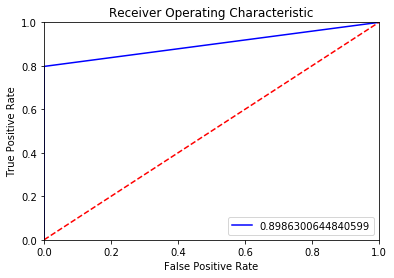

In [96]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)    # 'b' - color blue
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

In [97]:
from sklearn import metrics

fpr, tpr, z =metrics.roc_curve(Y_test,y_pred_prob[:,1])

auc = metrics.auc(fpr,tpr)
print(auc)
print(fpr)
print(tpr)

0.9307032866376339
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 3.89590151e-06 3.89590151e-06 7.79180302e-06
 7.79180302e-06 1.16877045e-05 1.16877045e-05 1.94795076e-05
 1.94795076e-05 4.67508181e-05 4.67508181e-05 5.06467197e-05
 5.06467197e-05 5.84385227e-05 5.84385227e-05 9.73975378e-05
 9.73975378e-05 1.01293439e-04 1.01293439e-04 1.05189341e-04
 1.05189341e-04 1.64796634e-03 1.64796634e-03 4.42964002e-03
 4.42964002e-03 5.15427770e-03 5.15427770e-03 6.76328502e-03
 6.76328502e-03 1.42356241e-02 1.42356241e-02 1.94210690e-02
 1.94210690e-02 2.78751753e-02 2.78751753e-02 3.16464080e-02
 3.16464080e-02 3.65396603e-02 3.65396603e-02 3.85382578e-02
 3.85382578e-02 5.00428549e-02 5.00428549e-02 5.30504909e-02
 5.30504909e-02 5.45893720e-02 5.45893720e-02 5.88865513e-02
 5.88865513e-02 6.24045504e-02 6.24045504e-02 7.74544180e-02
 7.74544180e-02 1.00284401e-01 1.00284401e-01 1.10444912e-01
 1.10

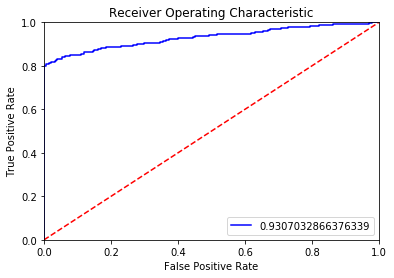

In [98]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# K-fold validation

In [99]:
#Using cross validation

classifier=(LogisticRegression())

#performing kfold_cross_validation
from sklearn.model_selection import KFold
kfold_cv=KFold(n_splits=10)
print(kfold_cv)

from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

KFold(n_splits=10, random_state=None, shuffle=False)
[0.98742863 0.99787973 0.9966276  0.99103476 0.99719523 0.99656082
 0.99679455 0.9972954  0.99771274 0.99732875]
0.9955858209647866


In [100]:

for train_value, test_value in kfold_cv.split(X_train):
    classifier.fit(X_train[train_value], Y_train[train_value]).predict(X_train[test_value])


Y_pred=classifier.predict(X_test)
#print(list(zip(Y_test,Y_pred)))

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256628     52]
 [    63    248]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.83      0.80      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9995525135121464


# Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(random_state=10,min_samples_leaf=5,max_depth=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=10, splitter='best')

In [103]:
Y_pred = model_DecisionTree.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


In [104]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256664     16]
 [    10    301]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.95      0.97      0.96       311

    accuracy                           1.00    256991
   macro avg       0.97      0.98      0.98    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9998988291418766


In [105]:

colname = test_data.columns


We are creating a text file which can be uploaded in webgraphviz.com to plot the decision tree 

In [106]:
from sklearn import tree
with open('decision_tree.txt','w') as f:
    
    f = tree.export_graphviz(model_DecisionTree, feature_names=colname[:-1], out_file=f)
    



#generate the file and upload the code in webgraphviz.com to plot the decision tree

# Random forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

model_Random = RandomForestClassifier(210 , random_state= 10)

model_Random = model_Random.fit(X_train , Y_train)

Y_pred = model_Random.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(Y_test , Y_pred)
print(cfm)
print("Classification report :")

print(classification_report(Y_test , Y_pred))

acc = accuracy_score(Y_test , Y_pred)
print("Accuracy of the model:" , acc)


[[175424  81256]
 [     1    310]]
Classification report :
              precision    recall  f1-score   support

           0       1.00      0.68      0.81    256680
           1       0.00      1.00      0.01       311

    accuracy                           0.68    256991
   macro avg       0.50      0.84      0.41    256991
weighted avg       1.00      0.68      0.81    256991

Accuracy of the model: 0.6838138300563055


# Xg boost

In [109]:
from xgboost import XGBClassifier     # xgboost can be used for large(cr.) no of data
model_GradientBoosting=XGBClassifier(random_state=10) # 100-no of tree or bags,random_state=10- for same data devide into all bags

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)
Y_pred=model_GradientBoosting.predict(X_test)

In [110]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[256679      1]
 [    10    301]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.97      0.98       311

    accuracy                           1.00    256991
   macro avg       1.00      0.98      0.99    256991
weighted avg       1.00      1.00      1.00    256991

Accuracy of the model:  0.9999571969446401
